In [5]:
import numpy as np 
def generateValues(r=0.5, num=1000):
    # generate random values from a normal distribution
    a = np.random.randn(num)
    # Error term 1
    e1 = np.random.randn(num)
    # Error term 2
    e2 = np.random.randn(num)
    # If the correlation coefficient is negative, return a positive value
    if r < 0:
        r = -r
        x = -np.sqrt(r)*a - np.sqrt(1-r)*e1
    else:
        x = np.sqrt(r)*a + np.sqrt(1-r)*e1
    y = np.sqrt(r)*a + np.sqrt(1-r)*e2
    
    # Get the correlation coefficient between x and y from the correlation matrix
    actual_r = np.corrcoef(x, y)[0][1]
    
    return x, y, actual_r   

Text(0.5, 1.0, 'r=0.52')

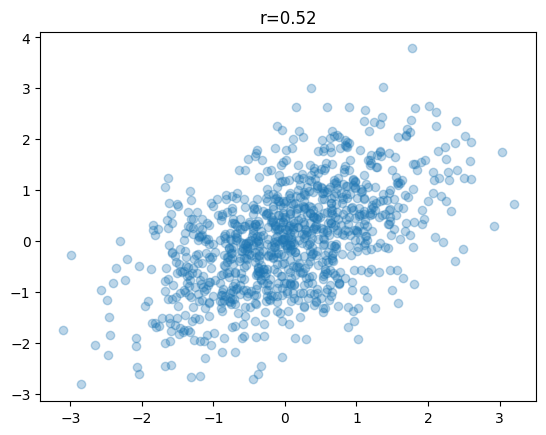

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y, actual_r = generateValues()
plt.scatter(x, y, alpha=0.3)
plt.title('r={:.2f}'.format(actual_r))

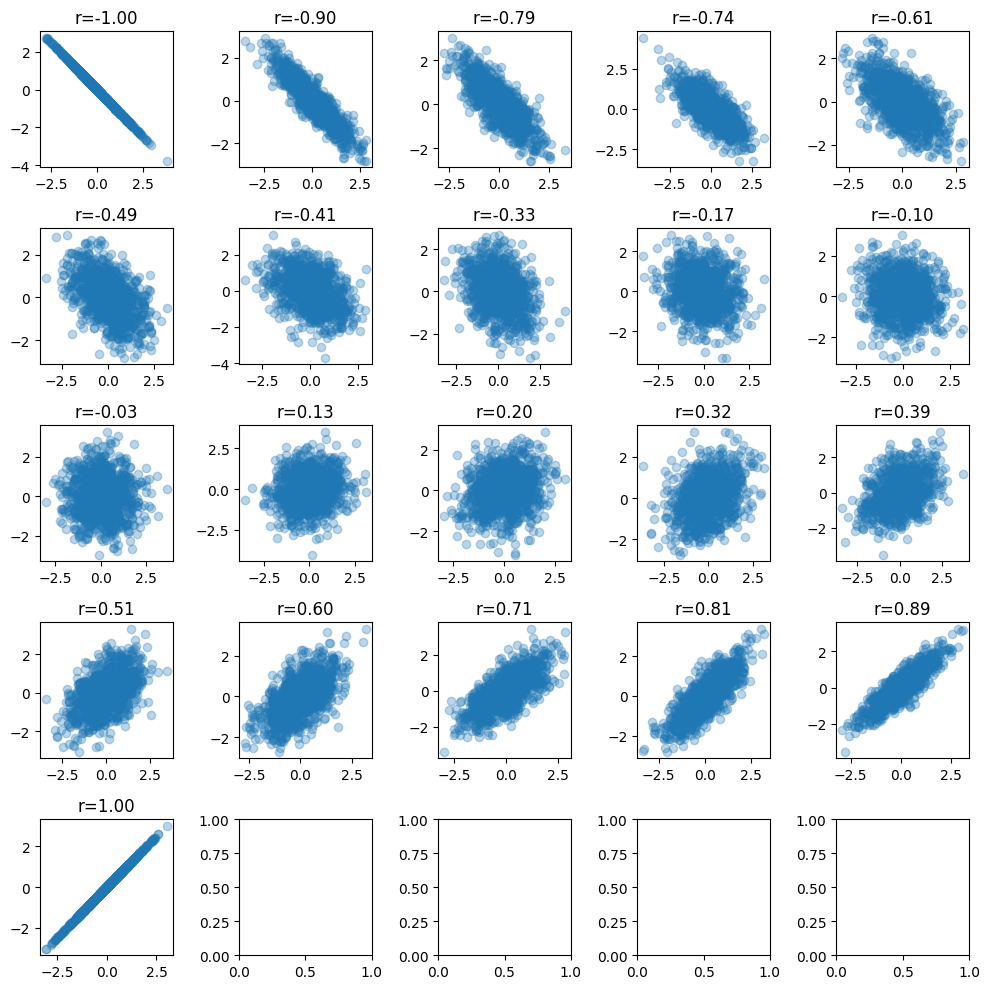

In [10]:
# Display a 7x3 plot
rows = 5
cols = 5
figsize = (10, 10)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for idx, r in enumerate(np.arange(-1, 1.1, 0.1)):
    # Specify the position of each plot
    row_i = idx // cols
    col_i = idx % cols
    # Calculate random values for the correlation coefficient
    x, y, actual_r = generateValues(r=r)
    # Display the actual correlation coefficient from the generated random values
    title = 'r={:.2f}'.format(actual_r)
    ax[row_i, col_i].scatter(x, y, alpha=0.3)
    ax[row_i, col_i].set_title(title)
# Prevent graph overlap
fig.tight_layout()

MEMO :
相関係数だけ見ても危険だという例を以下で示す

r=0.95 (before adding outlier)
r=-0.09 (after adding outlier)


Text(0, 0.5, 'height')

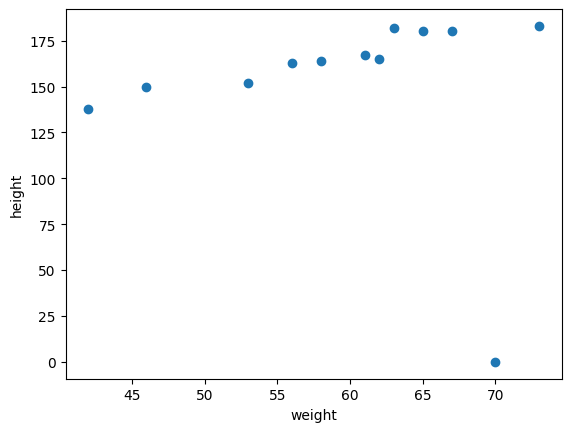

In [ ]:
import numpy as np
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

# Before adding outlier
r = np.corrcoef(weight, height)[0][1]
print('r={:.2f} (before adding outlier)'.format(r))
# Adding outlier
weight = np.append(weight, 70)
height = np.append(height, 0)
r = np.corrcoef(weight, height)[0][1]
print('r={:.2f} (after adding outlier)'.format(r))

plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')